## DV2599 Assignment 1
Oscar Andersson  
osae22@student.bth.se  
***
Petter Eriksson  
peer22@student.bth.se

## Load in the dataset

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load in the dataset
wine_df = pd.read_csv("winequality-white.csv", sep=";")

## 1. Inspect the dataset

In [3]:
# Describe the datasets features
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# Plot the beginning of the dataset to get an understanding of how it looks
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Class ratio

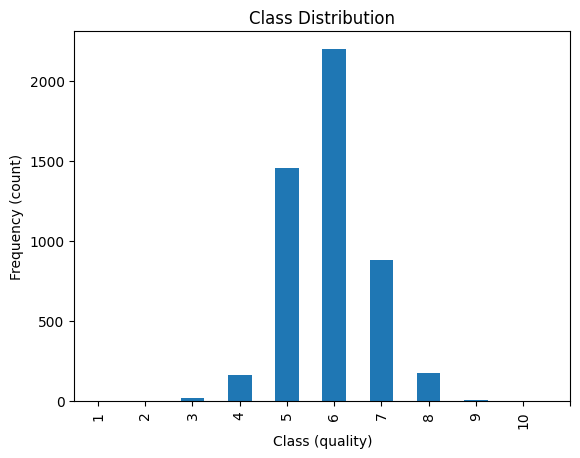

In [5]:
# Get the occurrences of each class
class_counts = wine_df["quality"].value_counts().reindex(range(1, 11))

# Plot a histogram of the occurrences
class_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class (quality)")
plt.ylabel("Frequency (count)")
plt.xticks(range(11))
plt.show()

The classes roughly look normally distributed around class 6.

## 2. Divide the data into train and test sets

In [6]:
# Extract input and output data
y = wine_df["quality"]
X = wine_df.drop("quality", axis="columns")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Scale the data

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Turn it back to pandas dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [8]:
X_train_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,0.293398,0.214148,0.201254,0.088694,0.109314,0.113071,0.300065,0.133186,0.425820,0.313111,0.406003
std,0.081497,0.109889,0.072811,0.077963,0.065606,0.059746,0.099359,0.057835,0.137235,0.132644,0.199109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.140541,0.162651,0.016871,0.080119,0.069930,0.229698,0.088876,0.336364,0.220930,0.241935
50%,0.288462,0.194595,0.192771,0.070552,0.100890,0.108392,0.290023,0.127048,0.418182,0.290698,0.387097
75%,0.336538,0.259459,0.234940,0.142638,0.121662,0.150350,0.366589,0.173222,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_test_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.295055,0.214981,0.201586,0.089350,0.108330,0.112543,0.300445,0.134053,0.425204,0.316433,0.403622
std,0.079731,0.105254,0.073307,0.077144,0.061658,0.058359,0.095574,0.056988,0.137493,0.132980,0.196070
min,0.057692,0.000000,0.000000,0.000000,0.017804,-0.003497,0.020882,0.006748,0.063636,0.034884,0.000000
25%,0.250000,0.151351,0.156627,0.018405,0.080119,0.069930,0.232019,0.089213,0.327273,0.232558,0.241935
50%,0.288462,0.205405,0.192771,0.072086,0.100890,0.108392,0.291183,0.129458,0.418182,0.302326,0.387097
75%,0.338942,0.266216,0.228916,0.142638,0.121662,0.150350,0.368910,0.176499,0.509091,0.383721,0.532258
max,0.625000,1.102703,0.602410,0.475460,0.697329,0.403846,0.610209,0.447079,0.981818,0.976744,0.967742


## 4. Perform validation

In [10]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Set up Repeated k-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=3, n_repeats=10)

# Weighted F1 score chosen since we have unbalanced classes and want a balance between precision and recall
scoring = 'f1_weighted'

# Evaluate KNN
knn_scores = cross_val_score(knn, X_train_scaled, y_train, scoring=scoring, cv=rkf)
knn_mean = np.mean(knn_scores)
knn_std = np.std(knn_scores)

# Evaluate Random Forest
rf_scores = cross_val_score(rf, X_train_scaled, y_train, scoring=scoring, cv=rkf)
rf_mean = np.mean(rf_scores)
rf_std = np.std(rf_scores)

# Print results
print(f'KNN: Mean = {knn_mean:.4f}, Std = {knn_std:.4f}')
print(f'Random Forest: Mean = {rf_mean:.4f}, Std = {rf_std:.4f}')

KNN: Mean = 0.5189, Std = 0.0111
Random Forest: Mean = 0.6310, Std = 0.0100


Random Forest was the best classifier based on the chosen metric.

## 5. Final model

In [11]:
# Initialize model
random_forest_model = RandomForestClassifier()

# Fit model to all of the test data
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

## 6. Model performance

In [12]:
from sklearn.metrics import f1_score

# Make the prediction based on the test input data
y_prediction = random_forest_model.predict(X_test_scaled)

# Evaluate using F1-score
model_score = f1_score(y_test, y_prediction, average="weighted")

# Print results
print(f"Random Forest Test F1-score: {model_score:.4f}")

Random Forest Test F1-score: 0.6749


## 7. Balance the scaled train set